In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt                           # plotting
import matplotlib.ticker as mtick
cmap = plt.cm.inferno

## Step 1: Get Data

In [2]:
x = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1 , 1.5, 1.1])
y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])

## Step 2: Subtract the mean

In [3]:
x_bar = np.mean(x)
y_bar = np.mean(y)
print('x-bar:', x_bar)
print('y-bar:', y_bar)
x_zero_mean = x - x_bar
y_zero_mean = y - y_bar

x-bar: 1.81
y-bar: 1.9100000000000001


## Step 3: Covariance Matrix

3.1 Numpy

In [4]:
cov_matrix = np.cov(x,y)
cov_matrix

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

3.2 Numpy with mean-centered

In [5]:
cov_matrix = np.cov(x - x_bar, y - y_bar)
cov_matrix

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

3.3 Checks by hand

In [6]:
# ChecK Covariance Matrix
print(np.std(x, ddof=1)**2) # STD to Variance
print(np.std(y, ddof=1)**2) # STD to Variance

n = len(x)
cov_xy = (1/(n-1))* np.sum(  (x - np.mean(x))*(y - np.mean(y)))
print(cov_xy)

0.6165555555555557
0.7165555555555555
0.6154444444444443


3.4 linear Algebra

In [21]:
# Is (X' X)^-1 the covariance Matrix
X = np.hstack([(x - np.mean(x)).reshape(-1,1) ,(y - np.mean(y)).reshape(-1,1)])
X

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

In [23]:
(1/(n-1)) * np.matmul(X.T, X)

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

## Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix

In [14]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print('\n')
print(eigenvectors) # Recall if Matrix has eigenvectors it has N vectors. 2x2 so N=2

[0.0490834  1.28402771]


[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


## Step 5: Choosing components and forming a feature vecto

Let's pick two to show recreating the data

In [29]:
data = np.vstack([x_zero_mean,y_zero_mean])
data.shape

(2, 10)

In [30]:
transformdata = np.matmul(eigenvectors.T, data)
print(transformdata.shape)
transformdata

(2, 10)


array([[-0.17511531,  0.14285723,  0.38437499,  0.13041721, -0.20949846,
         0.17528244, -0.3498247 ,  0.04641726,  0.01776463, -0.16267529],
       [-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
        -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056]])

Back to original Data

In [34]:
data_Original_recovered = np.matmul(eigenvectors, transformdata)
data_Original_recovered = data_Original_recovered.T + [x_bar, y_bar]
data_Original_recovered

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [35]:
data_Original_recovered[:,0] - x

array([ 0.00000000e+00,  2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
       -4.44089210e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [37]:
data_Original_recovered[:,1] - y

array([ 0.00000000e+00,  2.22044605e-16, -4.44089210e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.11022302e-16])

# Scikit Learn

In [48]:
x = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1 , 1.5, 1.1]).reshape(-1,1)
y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]).reshape(-1,1)
data = np.hstack([x,y])
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [68]:
X_scaled = data -  [np.mean(data[:,0]) , np.mean(data[:,1]) ]
X_scaled

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

Principal component analysis (PCA)

In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [75]:
X_pca.shape

(10, 2)

In [76]:
X_pca

array([[-0.82797019, -0.17511531],
       [ 1.77758033,  0.14285723],
       [-0.99219749,  0.38437499],
       [-0.27421042,  0.13041721],
       [-1.67580142, -0.20949846],
       [-0.9129491 ,  0.17528244],
       [ 0.09910944, -0.3498247 ],
       [ 1.14457216,  0.04641726],
       [ 0.43804614,  0.01776463],
       [ 1.22382056, -0.16267529]])

In [61]:
x_reverse = pca.inverse_transform(X_pca) 
x_reverse

array([[ 0.92627881,  0.61016865],
       [-1.7585873 , -1.506743  ],
       [ 0.52354889,  1.23278973],
       [ 0.12081898,  0.36112022],
       [ 1.73173864,  1.35731394],
       [ 0.6577922 ,  0.9837413 ],
       [ 0.25506228, -0.38602507],
       [-1.08737078, -1.00864614],
       [-0.41615425, -0.38602507],
       [-0.95312747, -1.25769457]])

In [62]:
scaler.inverse_transform(x_reverse)

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [89]:
def plot_corr(dataframe,size=10):                         # plots a graphical correlation matrix 
    from matplotlib.colors import ListedColormap          # make a custom colormap
    my_colormap = plt.cm.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    newcolors[65:191, :] = white                          # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0,cmap = newcmp)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

**Read Data**

In [42]:
df = pd.read_csv('w5.csv')
print(df.shape)
df.head()

(200, 6)


,y,x1,x2,x3,x4,x5
0,1.764742,0.925627,1.204426,0.949487,0.921375,0.958830
1,3.209386,0.459292,1.420216,-0.311133,0.967812,1.251093
2,-1.393265,0.844528,-0.634767,0.971616,0.020121,-0.224823
3,3.289348,0.946019,0.641351,1.069610,0.717315,0.612031
4,2.728297,0.024489,1.213368,0.261710,0.681006,0.864209


In [43]:
X = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()

**Feature Vector & Data Transform**

Each row is a component, top row is the first principal component (PC1). 

The columns are the features ordered from x1 through x5

In [44]:
pca_f5 = PCA(n_components=5)
X_pca = pca_f5.fit_transform(X)
print(np.round(pca_f5.components_,3))    

[[-0.005  0.758 -0.021  0.377  0.531]
 [ 0.568 -0.035  0.81   0.143 -0.013]
 [ 0.781 -0.094 -0.586  0.195 -0.02 ]
 [ 0.095 -0.353  0.009 -0.442  0.819]
 [ 0.243  0.539 -0.014 -0.777 -0.215]]


**Explained Variance Vector**

In [45]:
print('Variance explained by PC1 thru PC5 =', np.round(pca_f5.explained_variance_ratio_,3))

Variance explained by PC1 thru PC5 = [0.884 0.088 0.023 0.003 0.001]


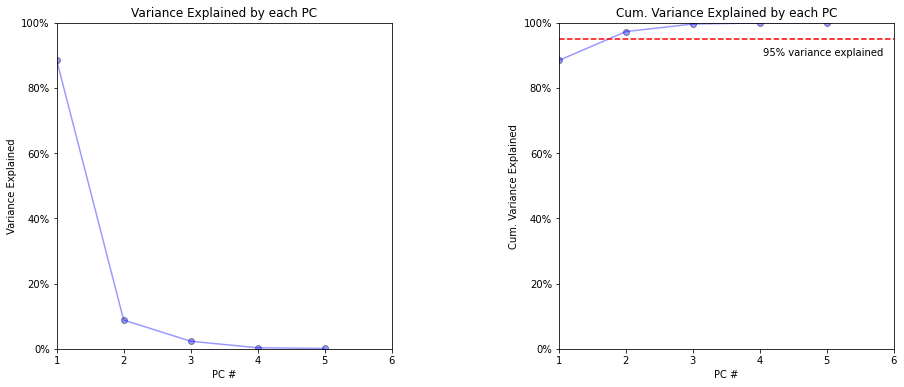

In [28]:
f, (ax10, ax11) = plt.subplots(1, 2,figsize=(15,6))
f.subplots_adjust(wspace=0.5,hspace = 0.3)

ax10.plot(np.arange(1,6,1),pca_f5.explained_variance_ratio_*100,color='blue',alpha=0.4)
ax10.scatter(np.arange(1,6,1),pca_f5.explained_variance_ratio_*100,color='blue',alpha=0.4,edgecolor='black')
ax10.set_xlabel('PC #'); ax10.set_ylabel('Variance Explained'); ax10.set_title('Variance Explained by each PC')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt); ax10.set_xlim(1,6); ax10.set_ylim(0,100.0)
ax10.yaxis.set_major_formatter(yticks)

ax11.plot(np.arange(1,6,1),np.cumsum(pca_f5.explained_variance_ratio_*100),color='blue',alpha=0.4)
ax11.scatter(np.arange(1,6,1),np.cumsum(pca_f5.explained_variance_ratio_*100),color='blue',alpha=0.4,edgecolor='black')
ax11.plot([1,6],[95,95], color='red',linestyle='dashed')
ax11.set_xlabel('PC #'); ax11.set_ylabel('Cum. Variance Explained'); ax11.set_title('Cum. Variance Explained by each PC')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt); ax11.set_xlim(1,6); ax11.set_ylim(0,100.0); ax11.annotate('95% variance explained',[4.05,90])
ax11.yaxis.set_major_formatter(yticks)

# plt.show()

**Transform Original Data**

In [47]:
X.shape

(200, 5)

In [48]:
transformdata = np.matmul(pca_f5.components_ , X.T)  # Each row is an eigenvector and each row in X is a feature
transformdata.shape 

(5, 200)

In [39]:
transformdata.T - X_train_pc

array([[ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.22517354,  0.06669033, -0.11059478],
       [ 0.2482993 ,  0.62846696,  0.2

In [46]:
X_pca

array([[ 1.49675570e+00,  7.42790307e-01, -1.21507506e-02,
        -1.65260356e-02,  4.91055995e-02],
       [ 1.86258438e+00, -5.47622244e-01,  3.45753495e-01,
         6.99897679e-02, -2.96057431e-02],
       [-8.66714791e-01,  6.65954876e-01, -6.73066371e-02,
         5.38095527e-02, -6.60705426e-03],
       [ 8.05897137e-01,  8.46786599e-01, -4.64852725e-02,
        -8.61252689e-03, -1.77249758e-02],
       [ 1.38205238e+00, -3.59278436e-01, -3.58179566e-01,
        -8.31892079e-02,  5.13611362e-02],
       [ 9.46547969e-01, -1.52544025e-01,  1.93842436e-02,
         7.09443735e-03, -9.08762138e-03],
       [ 7.49538764e-01, -4.58193191e-03, -6.00038651e-02,
         7.60104841e-02,  6.54630388e-02],
       [-6.70237382e-02,  1.53868935e-01, -9.25343823e-02,
        -9.34521075e-02,  1.26097665e-02],
       [ 9.40698516e-01, -4.06631587e-01, -1.56230633e-01,
         1.30116267e-01, -2.42016788e-02],
       [ 9.93834924e-01, -1.53751347e-01, -4.07334980e-01,
        -5.35618654e-02

In [ ]:
reg = LinearRegression().fit(transformdata, y)